In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
#read dataset
df=pd.read_csv('stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

### 3. Data Checks to Perform 
- check missing values 
- check duplicates 
- check data type 
- check the nuber of unique values of each column 
- check statistics of data set 
- check various categories present in the differeent categorical column

In [22]:
## check missing values

df.isnull().sum()
# df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### Insights or Observations
#### There is no missing value 

In [23]:
# check duplicates in data

# df[df.duplicated()]

df.duplicated().sum()

0

### Insights or Observations
#### there is no duplicates in data

In [11]:
# check datatypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
### Insights or Observations
####

In [25]:
# nos of unique values of each columns
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [20]:
for i in df.columns:
    print(f"{i} = {df[i].unique()}")
    print("----------------------------------------------------------------------")

gender = ['female' 'male']
----------------------------------------------------------------------
race_ethnicity = ['group B' 'group C' 'group A' 'group D' 'group E']
----------------------------------------------------------------------
parental_level_of_education = ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
----------------------------------------------------------------------
lunch = ['standard' 'free/reduced']
----------------------------------------------------------------------
test_preparation_course = ['none' 'completed']
----------------------------------------------------------------------
math_score = [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32 

In [ ]:
### Insights or Observations
####

In [10]:
# check stats of dataset
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Insights or Observations 
- from the above description of numerical data, all means are bery close to each other 
- all the standard deviation are also close between 14.6 - 15.19 
- while there is minimum of 0 for maths , others having 17 and 10 value

In [27]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [36]:
# segrregate numerical and categorical features
numerical_features= [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']

In [37]:
print(numerical_features)
print(categorical_feature)

['math_score', 'reading_score', 'writing_score']
['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [38]:
## Aggregate the total score with mean
df['total_score'] = df['math_score'] +df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


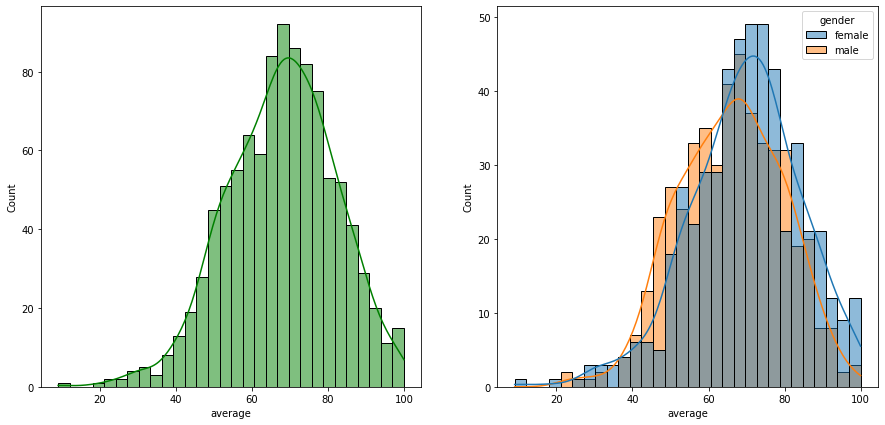

In [45]:
### Explore more visualization
fig, axis = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='average',  bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average',  bins=30, kde=True, hue='gender')
plt.show()

### Insights or Observations 
- females student tend to perform well than male students 

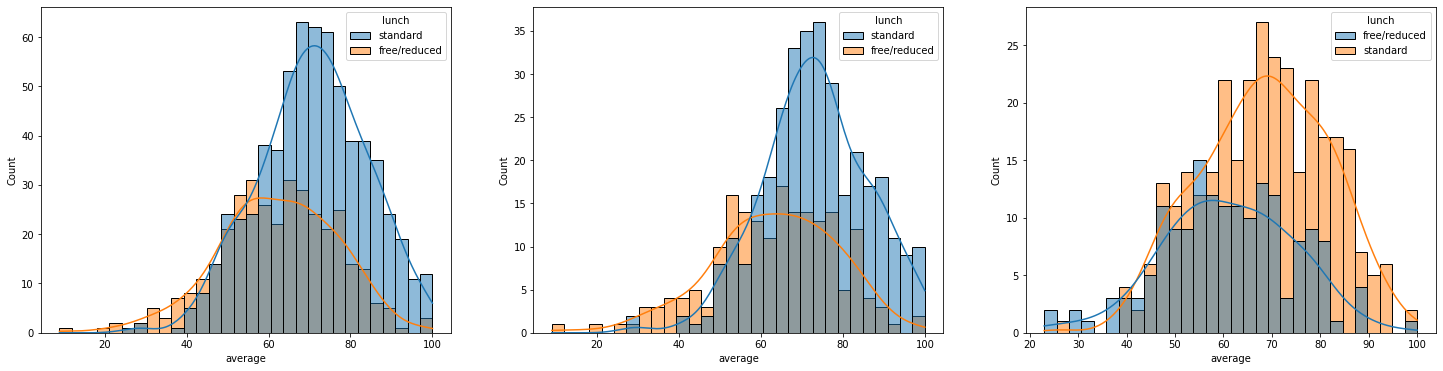

In [50]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df, x='average', hue='lunch', bins=30, kde=True)
plt.subplot(132)
sns.histplot(data=df[df.gender == 'female'], x='average', hue='lunch', bins=30, kde=True)
plt.subplot(133)
sns.histplot(data=df[df.gender == 'male'], x='average', hue='lunch', bins=30, kde=True)
plt.show()

### Insights
- standard level of lunch will help students to perform well in exam
- standard level of lunch will help both male and female to perform well in exam

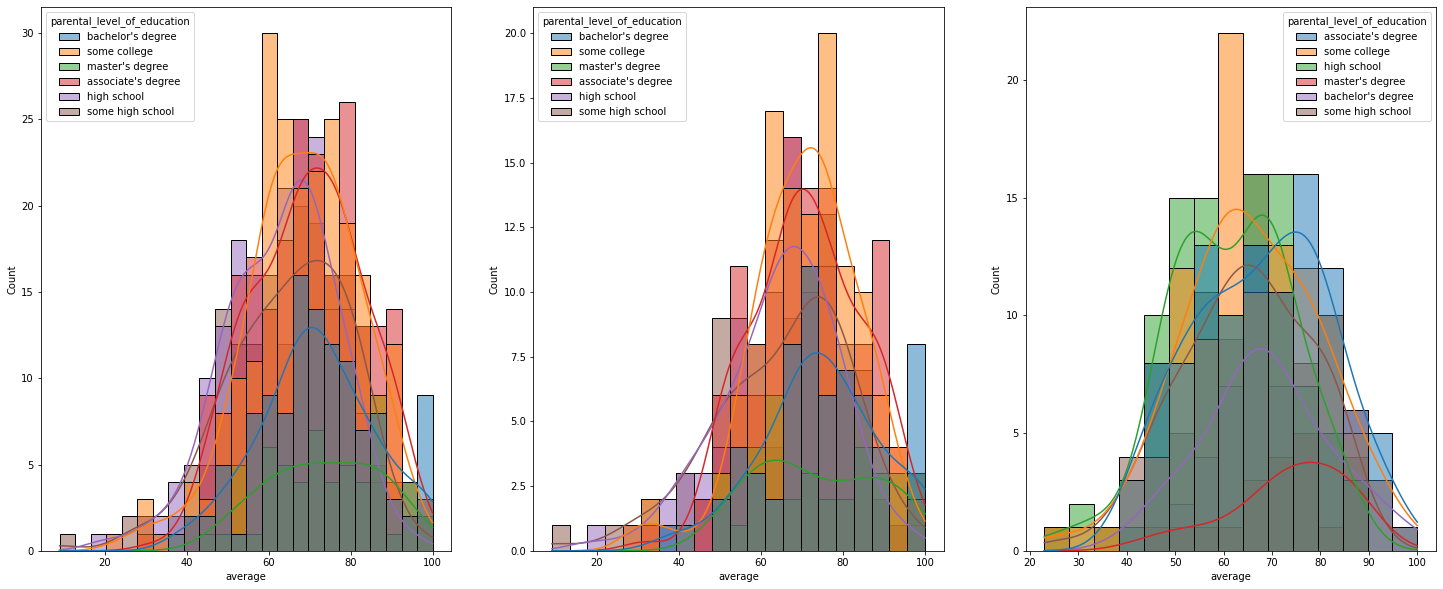

In [56]:
plt.subplots(1,3,figsize=(25,10))
plt.subplot(131)
sns.histplot(data=df, x='average', hue='parental_level_of_education', kde=True)
plt.subplot(132)
sns.histplot(data=df[df.gender == 'female'], x='average', hue='parental_level_of_education', kde=True)
plt.subplot(133)
sns.histplot(data=df[df.gender == 'male'], x='average', hue='parental_level_of_education', kde=True)
plt.show()

### Insights
- 1st plot - parents education dont help students to perform well in exam
- 3rd plot - whose education is assosiate's degree and matsers degree their male child performs well in exam
- 2nd plot - there is no  effect of parents education on female students

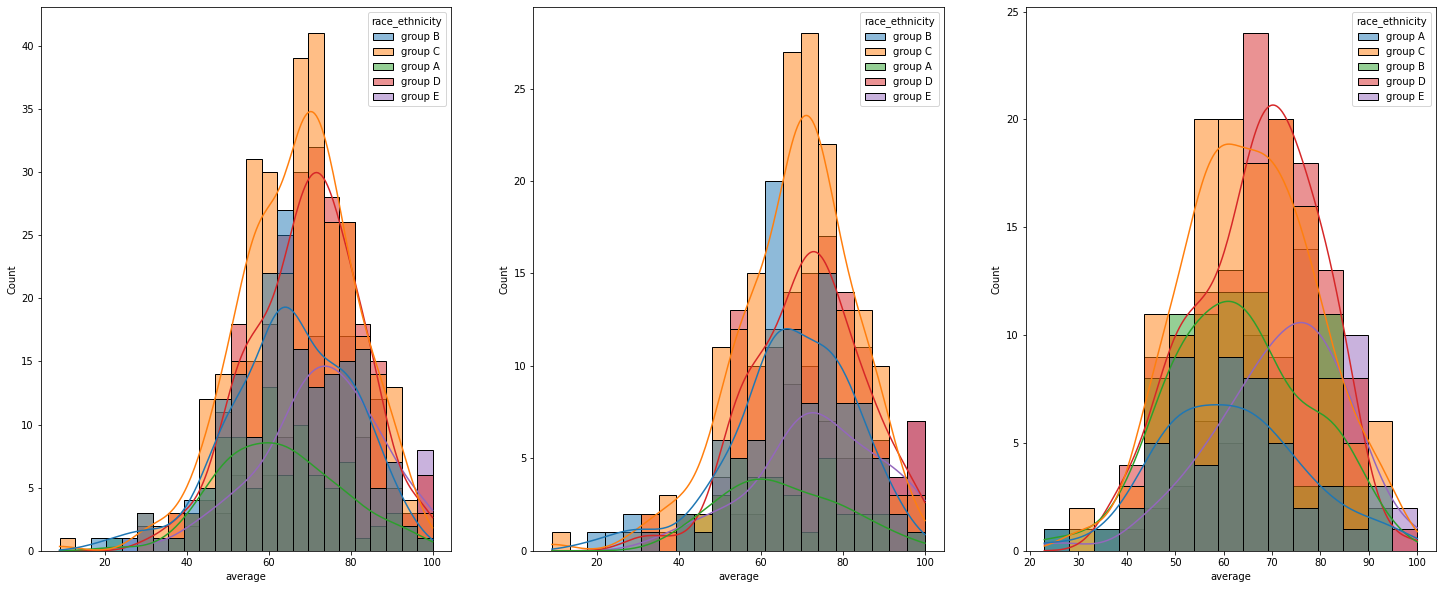

In [58]:
plt.subplots(1,3,figsize=(25,10))
plt.subplot(131)
sns.histplot(data=df, x='average', hue='race_ethnicity', kde=True)
plt.subplot(132)
sns.histplot(data=df[df.gender == 'female'], x='average', hue='race_ethnicity', kde=True)
plt.subplot(133)
sns.histplot(data=df[df.gender == 'male'], x='average', hue='race_ethnicity', kde=True)
plt.show()

### Insights 
- sudents of group A and B tends to perform poorly in exam
- students of group A and B tends to perform poorly in exam irrespective of wheteher  they are male or female

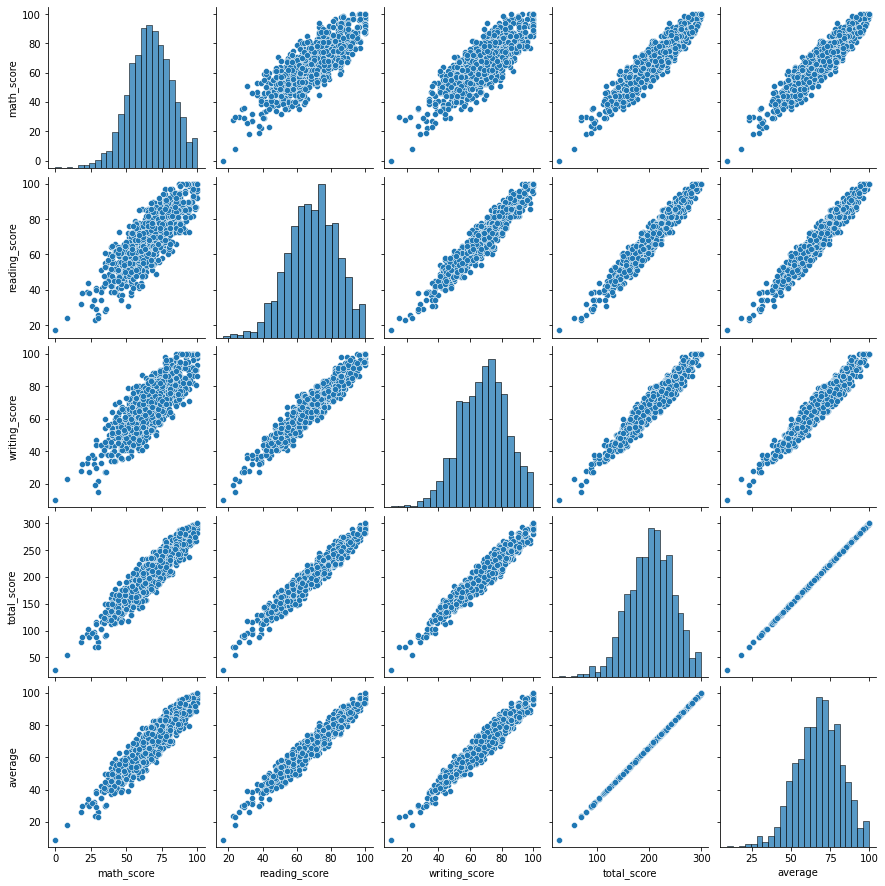

In [59]:
sns.pairplot(df)

In [64]:
sns.heatmap(df.corr(), annot=True)

ValueError: could not convert string to float: 'female'